# **CDN-UFPB**
## Tópico 1: Ingestão e resumo de dados
---
- **Professor: Aléssio Almeida**
- **Disciplina: Técnicas de Pesquisa e Análise de Dados II**

## Questão 01

In [22]:
# Importação seletiva
from pandas import read_csv
from numpy import round

# USUÁRIOS WINDOWS: PRECISAM ALTERAR \ POR / NO DIRETÓRIO
sa_dir = '/Users/alessiotony/Desktop/dados/inep/censo_superior'

# TABELA CADASTRO DE CURSOS
colunas = ['NU_ANO_CENSO', 'SG_UF', 'CO_UF', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
           'TP_MODALIDADE_ENSINO', 'QT_ING', 'QT_CONC', 'NO_CINE_ROTULO', 
           'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL']

ano = 2020
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV.gz'
d2020 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

ano=2015
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV.gz'
d2015 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)


In [3]:
# TABELA CADASTRO DE IES
colunas = ['CO_IES', 'NO_REGIAO_IES', 'CO_REGIAO_IES', 'NO_IES', 'SG_IES']

ano = 2020
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_IES_{ano}.CSV.gz'
ies = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)
ies.head()

NO_REGIAO_IES  CO_REGIAO_IES  CO_IES                               NO_IES  \
0  Centro-Oeste              5       1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
1  Centro-Oeste              5       2             UNIVERSIDADE DE BRASÍLIA   
2      Nordeste              2       3      UNIVERSIDADE FEDERAL DE SERGIPE   
3         Norte              1       4     UNIVERSIDADE FEDERAL DO AMAZONAS   
4      Nordeste              2       5        UNIVERSIDADE FEDERAL DO PIAUÍ   

  SG_IES  
0   UFMT  
1    UNB  
2    UFS  
3   UFAM  
4   UFPI

## Questão 02


In [4]:
print('2015', d2015.info())
print('2020', d2020.info())
print('IES', ies.info())

# Que não houveram problemas de tipagem nos dados de interesse ING e CONC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77897 entries, 0 to 77896
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NU_ANO_CENSO                 77897 non-null  int64  
 1   SG_UF                        76466 non-null  object 
 2   CO_UF                        76466 non-null  float64
 3   TP_CATEGORIA_ADMINISTRATIVA  77897 non-null  int64  
 4   CO_IES                       77897 non-null  int64  
 5   NO_CINE_ROTULO               77897 non-null  object 
 6   CO_CINE_ROTULO               77897 non-null  object 
 7   CO_CINE_AREA_GERAL           77897 non-null  int64  
 8   NO_CINE_AREA_GERAL           77897 non-null  object 
 9   TP_MODALIDADE_ENSINO         77897 non-null  int64  
 10  QT_ING                       77897 non-null  int64  
 11  QT_CONC                      77897 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.1+ MB
2015 None
<class 

In [5]:
# d2015.TP_CATEGORIA_ADMINISTRATIVA.value_counts()
d2015 = d2015.query('TP_CATEGORIA_ADMINISTRATIVA==1')
d2020 = d2020.query('TP_CATEGORIA_ADMINISTRATIVA==1')


In [6]:
d2020.query('TP_CATEGORIA_ADMINISTRATIVA==1 | CO_UF==25').CO_IES.value_counts()

5        345
579      279
3        224
582      221
583      207
        ... 
26         1
21095      1
21206      1
23028      1
21416      1
Name: CO_IES, Length: 118, dtype: int64

## Questão 03

In [14]:

# a) Agrupar os dados
q2020 = (
    d2020.groupby(['CO_IES', 'NO_CINE_ROTULO', 'CO_CINE_ROTULO', 
               'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL', 'TP_MODALIDADE_ENSINO'])
    .agg(concluintes = ('QT_CONC', 'sum'))
    .reset_index()
)

q2015 = (
    d2015.rename(columns = {'CO_CINE_ROTULO': 'CO_CURSO'})
    .groupby(['CO_IES', 'CO_CURSO'])
    .agg(ingressantes = ('QT_ING', 'sum'))
    .reset_index()
)

# b) Combinar os dados
df = q2020.merge(q2015, 
                 left_on=['CO_IES', 'CO_CINE_ROTULO'],
                 right_on=['CO_IES', 'CO_CURSO'],
                 how='inner', indicator=True).assign(
                     ano = 2020,
                     evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1),
                    #  nome_curso = lambda x: x.NO_CINE_ROTULO.str.upper(),
                    #  concluintes2 = lambda x: x.concluintes**2,
                    #  ingressantes2 = lambda x: x.concluintes**2,
                    #  concluintesRaiz = lambda x: x.concluintes**0.5,                     
                 )
# df = q2020.merge(q2015, on=['CO_IES', 'CO_CINE_ROTULO'], how='inner', indicator=True)



# Questão 04

In [25]:
df = df.merge(ies, on='CO_IES', how='inner')
df
# df.rename(columns=lambda x: x.lower()).to_excel('/Users/alessiotony/repositorios/public/dspy/data/cs_evasao_2020.xlsx', index=False)

CO_IES                                     NO_CINE_ROTULO  \
0          1                                      Administração   
1          1                              Administração pública   
2          1                                          Agronomia   
3          1                                          Alimentos   
4          1                            Arquitetura e urbanismo   
...      ...                                                ...   
4456   18812            Ciências naturais formação de professor   
4457   18812  Programas interdisciplinares abrangendo artes ...   
4458   18812  Programas interdisciplinares abrangendo ciênci...   
4459   18812   Programas interdisciplinares abrangendo educação   
4460   18812  Programas interdisciplinares abrangendo saúde ...   

     CO_CINE_ROTULO  CO_CINE_AREA_GERAL  \
0           0413A01                   4   
1           0413A02                   4   
2           0811A04                   8   
3           0721A01                   7   
4           0731A02                   7   
...             ...                 ...   
4456        0114C02                   1   
4457        0288P01                   2   
4458        0588P01                   5   
4459        0188P01                   1   
4460        0988P01                   9   

                                  NO_CINE_AREA_GERAL  TP_MODALIDADE_ENSINO  \
0                  Negócios, administração e direito                     1   
1                  Negócios, administração e direito                     2   
2     Agricultura, silvicultura, pesca e veterinária                     1   
3                  Engenharia, produção e construção                     1   
4                  Engenharia, produção e construção                     1   
...                                              ...                   ...   
4456                                        Educação                     1   
4457                             Artes e humanidades                     1   
4458     Ciências naturais, matemática e estatística                     1   
4459                                        Educação                     1   
4460                               Saúde e bem-estar                     1   

      concluintes CO_CURSO  ingressantes _merge   ano  evasao NO_REGIAO_IES_x  \
0               9  0413A01           262   both  2020    96.6    Centro-Oeste   
1               0  0413A02             0   both  2020     NaN    Centro-Oeste   
2              45  0811A04           230   both  2020    80.4    Centro-Oeste   
3              10  0721A01            63   both  2020    84.1    Centro-Oeste   
4              20  0731A02            61   both  2020    67.2    Centro-Oeste   
...           ...      ...           ...    ...   ...     ...             ...   
4456           11  0114C02             0   both  2020    -inf        Nordeste   
4457           45  0288P01           160   both  2020    71.9        Nordeste   
4458           34  0588P01           180   both  2020    81.1        Nordeste   
4459           32  0188P01             0   both  2020    -inf        Nordeste   
4460          143  0988P01           220   both  2020    35.0        Nordeste   

      CO_REGIAO_IES_x                              NO_IES_x SG_IES_x  \
0                   5   UNIVERSIDADE FEDERAL DE MATO GROSSO     UFMT   
1                   5   UNIVERSIDADE FEDERAL DE MATO GROSSO     UFMT   
2                   5   UNIVERSIDADE FEDERAL DE MATO GROSSO     UFMT   
3                   5   UNIVERSIDADE FEDERAL DE MATO GROSSO     UFMT   
4                   5   UNIVERSIDADE FEDERAL DE MATO GROSSO     UFMT   
...               ...                                   ...      ...   
4456                2  UNIVERSIDADE FEDERAL DO SUL DA BAHIA     UFSB   
4457                2  UNIVERSIDADE FEDERAL DO SUL DA BAHIA     UFSB   
4458                2  UNIVERSIDADE FEDERAL DO SUL DA BAHIA     UFSB   
4459                2  UNIVERSIDADE FEDERAL DO SUL DA 

## Questão 05

In [107]:

df_ies = (
    df.groupby('SG_IES')
    .agg(regiao = ('NO_REGIAO_IES', 'first'),
         concluintes=('concluintes', 'sum'),
         ingressantes=('ingressantes', 'sum'))
    .assign(evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1))
    .reset_index()
    .sort_values('evasao', ascending=False)
    .assign(rank = lambda x: x.evasao.rank(ascending=False))
    
)

tab1 = df_ies.head(10).filter(items = ['rank', 'SG_IES', 'evasao'])
tab1

rank     SG_IES  evasao
90   1.0        UFU    91.1
21   2.0       IFMS    89.5
38   3.0      IFSul    88.0
8    4.0  IF Sertão    85.8
48   5.5       UFBA    85.7
64   5.5       UFMT    85.7
14   7.0       IFBA    84.5
15   8.0   IFBAIANO    83.8
23   9.0      IFNMG    82.0
24  10.0       IFPA    81.7

## Questão 06

<AxesSubplot: >

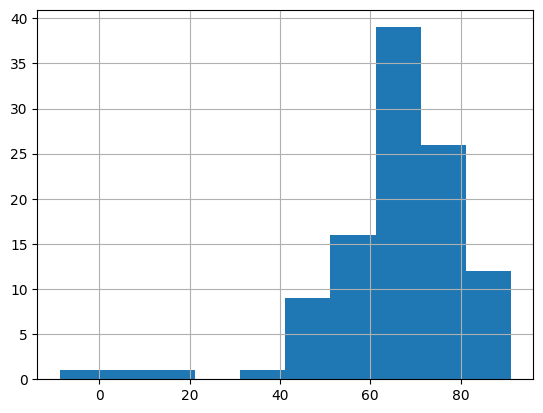

In [77]:
df_ies.evasao.hist()

## Q7

In [103]:
tab2 = (df.sort_values('evasao', ascending=False)
 .merge(ies)
#  .query('SG_IES=="UFPB"')
 .head(10) 
 .filter(items=['SG_IES', 'NO_CINE_ROTULO', 'evasao'])
)
tab2

SG_IES                                  NO_CINE_ROTULO  evasao
0   UFPI                                         Turismo   100.0
1   UFPI                                         Química    92.0
2   UFPI                                        Medicina    90.3
3   UFPI                                  Serviço social    89.5
4   UFPI                                     Odontologia    89.2
5   UFPI                                      Matemática    88.9
6   UFPI           Educação física formação de professor    88.1
7   UFPI  Letras português francês formação de professor    87.2
8   UFPI         Ciências naturais formação de professor    86.1
9   UFPI                                     Estatística    84.8

## Q8

In [104]:

df_area = (
    df.groupby('NO_CINE_AREA_GERAL')
    .agg(curso=('NO_CINE_ROTULO', 'first'),
         concluintes=('concluintes', 'sum'),
         ingressantes=('ingressantes', 'sum'))
    .assign(evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1))
    .reset_index()
    .sort_values('evasao', ascending=False)
    .assign(rank = lambda x: x.evasao.rank(ascending=False))
    
)

tab3 = df_area.head(5).filter(items = ['rank', 'NO_CINE_AREA_GERAL', 'curso', 'evasao'])
tab3

rank                                 NO_CINE_AREA_GERAL  \
8   1.0                                  Programas básicos   
4   2.0  Computação e Tecnologias da Informação e Comun...   
2   3.0        Ciências naturais, matemática e estatística   
0   4.0     Agricultura, silvicultura, pesca e veterinária   
3   5.0         Ciências sociais, comunicação e informação   

                     curso  evasao  
8  ABI Artes e humanidades   100.0  
4    Ciência da computação    76.8  
2                 Biologia    72.4  
0                Agronomia    66.9  
3         Ciências sociais    65.6

# Q9

In [106]:
df_ies.evasao.describe()

count    106.000000
mean      65.866981
std       14.993489
min       -8.700000
25%       60.350000
50%       67.600000
75%       74.625000
max       91.100000
Name: evasao, dtype: float64

# Q10

In [108]:
df_ies.filter(items=['regiao', 'evasao']).groupby('regiao').describe()

evasao                                                         
              count       mean        std   min     25%    50%     75%   max
regiao                                                                      
Centro-Oeste   10.0  71.810000   9.428143  61.4  66.550  68.70  74.875  89.5
Nordeste       28.0  67.814286  14.556625  19.8  61.150  71.45  77.175  85.8
Norte          17.0  64.294118  21.137037  -8.7  62.400  70.40  72.700  81.7
Sudeste        34.0  60.417647  13.617646   6.6  55.625  61.05  66.300  91.1
Sul            17.0  71.635294  10.424367  43.0  67.100  73.30  77.700  88.0

# Q11

In [120]:
tab1Final = (
    tab1.rename(columns={'rank': 'Posição', 'SG_IES': 'Instituição', 'evasao': 'Taxa de Evasão (%)'})
    .astype({'Posição': int})
)
tab1Final.to_excel('~/Desktop/tab1.xlsx', index=False)
tab1Final.to_latex('~/Desktop/tab1.tex', index=False)


/var/folders/dn/vppnnjmx4w72p1ln1y25grjw0000gn/T/ipykernel_2462/821271654.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab1Final.to_latex('~/Desktop/tab1.tex', index=False)


In [23]:
d2015.query('CO_IES==579').groupby(['CO_IES']).agg(media = ('QT_ING', 'mean'),
                                                   max = ('QT_ING', 'max'))

media  max
CO_IES               
579     28.67803  440

CO_IES                          NO_CINE_ROTULO CO_CINE_ROTULO  \
3054     830  Letras português formação de professor        0115L13   
4169   18506         Geografia formação de professor        0114G01   
3553    3184                       Gestão hospitalar        0413G11   
1861     581           Química formação de professor        0114Q01   
3340    1812                  Sistemas de informação        0615S02   
1379     575                  Sistemas de informação        0615S02   
2967     699                              Psicologia        0313P01   
2724     601            Gestão desportiva e de lazer        1014G01   
3906    5322                        Ciência política        0312C01   
2086     584                             Estatística       5,42E+03   

      CO_CINE_AREA_GERAL                                 NO_CINE_AREA_GERAL  \
3054                   1                                           Educação   
4169                   1                                           Educação   
3553                   4                  Negócios, administração e direito   
1861                   1                                           Educação   
3340                   6  Computação e Tecnologias da Informação e Comun...   
1379                   6  Computação e Tecnologias da Informação e Comun...   
2967                   3         Ciências sociais, comunicação e informação   
2724                  10                                           Serviços   
3906                   3         Ciências sociais, comunicação e informação   
2086                   5        Ciências naturais, matemática e estatística   

      concluintes  CO_CURSO  ingressantes _merge   ano  evasao  \
3054            6   0115L13            50   both  2020    88.0   
4169            1   0114G01            11   both  2020    90.9   
3553            0   0413G11            26   both  2020   100.0   
1861           12   0114Q01            37   both  2020    67.6   
3340           10   0615S02            40   both  2020    75.0   
1379           36   0615S02            80   both  2020    55.0   
2967            3   0313P01            31   both  2020    90.3   
2724            3   1014G01            27   both  2020    88.9   
3906            5   0312C01            53   both  2020    90.6   
2086           12  5,42E+03            49   both  2020    75.5   

                                  nome_curso  concluintes2  ingressantes2  \
3054  LETRAS PORTUGUÊS FORMAÇÃO DE PROFESSOR            36             36   
4169         GEOGRAFIA FORMAÇÃO DE PROFESSOR             1              1   
3553                       GESTÃO HOSPITALAR             0              0   
1861           QUÍMICA FORMAÇÃO DE PROFESSOR           144            144   
3340                  SISTEMAS DE INFORMAÇÃO           100            100   
1379                  SISTEMAS DE INFORMAÇÃO          1296           1296   
2967                              PSICOLOGIA             9              9   
2724            GESTÃO DESPORTIVA E DE LAZER             9              9   
3906                        CIÊNCIA POLÍTICA            25             25   
2086                             ESTATÍSTICA           144            144   

      concluintesRaiz NO_REGIAO_IES  CO_REGIAO_IES  \
3054         2.449490         Norte              1   
4169         1.000000      Nordeste              2   
3553         0.000000         Norte              1   
1861         3.464102           Sul              4   
3340         3.162278         Norte              1   
1379         6.000000       Sudeste              3   
2967         1.732051         Norte              1   
2724         1.732051           Sul              4   
3906         2.236068           Sul              4   
2086         3.464102  Centro-Oeste              5   

                                                 NO_IES    SG_IES  
3054                      UNIVERSIDADE FEDERAL DO AMAPÁ    UNIFAP  
4169             UNIVERSIDADE FEDERAL DO OESTE D

In [10]:

q2020 = (
    d2020.groupby(['CO_IES', 'NO_CINE_ROTULO', 'CO_CINE_ROTULO', 
               'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL', 'TP_MODALIDADE_ENSINO'])
    .agg(concluintes2020 = ('QT_CONC', 'sum'),
         ingressantes2020 = ('QT_ING', 'sum'))
    .reset_index()
)

q2015 = (
    d2015.rename(columns = {'CO_CINE_ROTULO': 'CO_CURSO'})
    .groupby(['CO_IES', 'CO_CURSO'])
    .agg(concluintes2015 = ('QT_CONC', 'sum'),
         ingressantes2015 = ('QT_ING', 'sum'))
    .reset_index()
)

# b) Combinar os dados
df = q2020.merge(q2015, 
                 left_on=['CO_IES', 'CO_CINE_ROTULO'],
                 right_on=['CO_IES', 'CO_CURSO'],
                 how='outer', indicator=True).assign(
                 )

df = df.merge(ies, on='CO_IES', how='inner').rename(columns=lambda x: x.lower())

df.to_excel('~/Desktop/censo_superior.xlsx')
